In [283]:
%pylab inline

import pandas
import matplotlib
import seaborn

from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [284]:
shards = pandas.read_csv('csv/experiment-hashed-1.csv', index_col = 'total')

In [285]:
shardc = list(set(shards.columns) - {'total'})

In [286]:
shards.index.name = u'Publicaciones Totales'

In [287]:
next(shards.iteritems())

('shard1', Publicaciones Totales
 20000      3970
 40000      7979
 60000     12000
 80000     15999
 100000    19968
 120000    24017
 140000    28113
 160000    32055
 180000    35999
 200000    39889
 220000    43965
 240000    47961
 260000    51904
 280000    55854
 300000    59820
 320000    63791
 340000    67683
 360000    71707
 380000    75701
 400000    79715
 420000    83766
 440000    87698
 460000    91684
 480000    95652
 500000    99771
 Name: shard1, dtype: int64)

In [288]:
'asdf'.title()

'Asdf'

In [289]:
import re

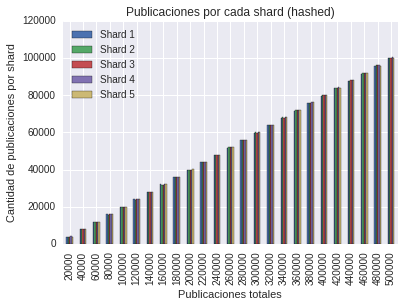

In [290]:
ax = shards.rename(columns = lambda s: '{} {}'.format(s[:5], s[5]).title()).plot(kind = 'bar', title = 'asdf')

ax.set_title('Publicaciones por cada shard (hashed)')
ax.set_ylabel('Cantidad de publicaciones por shard')
ax.set_xlabel('Publicaciones totales')

pyplot.savefig('../informe/imagenes/publicaciones_by_shard.png')

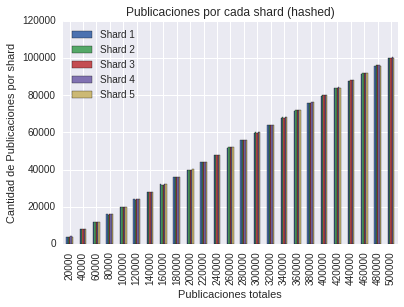

In [291]:
ax = shards.rename(columns = lambda s: '{} {}'.format(s[:5], s[5]).title()).plot(kind = 'bar', title = 'asdf')

ax.set_title('Publicaciones por cada shard (hashed)')
ax.set_ylabel('Cantidad de Publicaciones por shard')
ax.set_xlabel('Publicaciones totales')

pyplot.savefig('../informe/imagenes/publicaciones_by_shard.png')

In [292]:
shards

,shard1,shard2,shard3,shard4,shard5
Publicaciones Totales,,,,,
20000,3970,3957,3934,4134,4005
40000,7979,7933,8018,7995,8075
60000,12000,11891,12002,12022,12085
80000,15999,15799,15993,16092,16117
100000,19968,19877,20008,20013,20134
120000,24017,23810,24072,24035,24066
140000,28113,27737,27992,28042,28116
160000,32055,31792,31936,32022,32195
180000,35999,35911,35940,35964,36186


In [293]:
ax.hlines

<bound method Axes.hlines of <matplotlib.axes._subplots.AxesSubplot object at 0x7ff8d6866550>>

In [294]:
#t

In [295]:
ax.lines

[]

In [296]:
ax.vlines

<bound method Axes.vlines of <matplotlib.axes._subplots.AxesSubplot object at 0x7ff8d6866550>>

In [297]:
f = ax.legend()

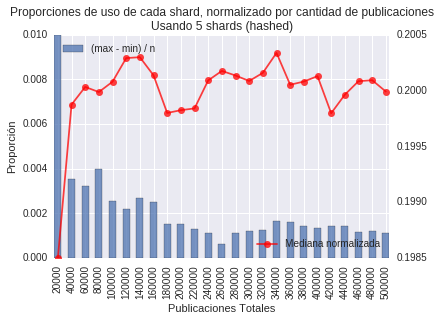

In [298]:
pyplot.title(u'Proporciones de uso de cada shard, normalizado por cantidad de publicaciones\nUsando 5 shards (hashed)')
pyplot.ylabel(u'Proporción')

pt = pandas.DataFrame({
    u'Proporción': shards.apply(lambda s: (s.max() - s.min()) / s.name, axis = 1),
    'Mediana': shards.apply(lambda s: s.median() / s.name, axis = 1)
})

ax = pt[u'Proporción'].plot(alpha = .75, kind = 'bar', label = '(max - min) / n')

pyplot.legend(loc = 2)

ax2 = ax.twinx()
ax2.grid()
t, = ax2.plot(ax.get_xticks(), pt['Mediana'].values, alpha = .75, color = 'r', marker = 'o', label = 'Mediana normalizada')

pyplot.legend(loc = 0)

pyplot.savefig('../informe/imagenes/range_median_normalized.png')

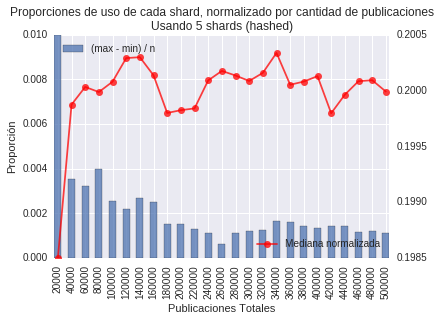

In [299]:
pyplot.title(u'Proporciones de uso de cada shard, normalizado por cantidad de publicaciones\nUsando 5 shards (hashed)')
pyplot.ylabel(u'Proporción')

pt = pandas.DataFrame({
    u'Proporción': shards.apply(lambda s: (s.max() - s.min()) / s.name, axis = 1),
    'Mediana': shards.apply(lambda s: s.median() / s.name, axis = 1)
})

ax = pt[u'Proporción'].plot(alpha = .75, kind = 'bar', label = '(max - min) / n')

pyplot.legend(loc = 2)

ax2 = ax.twinx()
ax2.grid()
t, = ax2.plot(ax.get_xticks(), pt['Mediana'].values, alpha = .75, color = 'r', marker = 'o', label = 'Mediana normalizada')

pyplot.legend(loc = 0)

pyplot.savefig('../informe/imagenes/range_median_normalized.png')

# Boxplots

In [300]:
shards = pandas.read_csv('csv/experiment-hashed-concat.csv')

In [301]:
shards.head()

,shard1,shard2,shard3,shard4,shard5,total
0,4085,3993,3982,3943,3997,20000
1,8071,7961,8010,7933,8025,40000
2,12092,11908,11947,11889,12164,60000
3,16116,15973,15819,15975,16117,80000
4,20108,20012,19744,19981,20155,100000


In [302]:
shards[shards.total == 20000]

,shard1,shard2,shard3,shard4,shard5,total
0,4085,3993,3982,3943,3997,20000
25,3970,3957,3934,4134,4005,20000
50,3911,4022,4085,3956,4026,20000
75,4001,4034,3952,4044,3969,20000
100,4018,4002,4036,4105,3839,20000
125,4054,3957,4023,4005,3961,20000
150,3994,4047,3986,4047,3926,20000
175,3958,4036,4023,3986,3997,20000
200,4002,3913,3986,4027,4072,20000
225,4019,3954,4138,3953,3936,20000


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


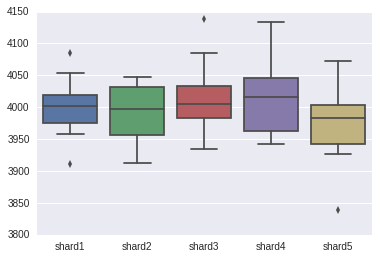

In [303]:
seaborn.boxplot(shards[shards.total == 20000].drop('total', axis = 1))

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


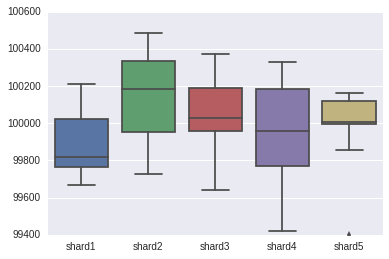

In [304]:
seaborn.boxplot(shards[shards.total == shards.total.max()].drop('total', axis = 1))

In [305]:
pe = shards.drop('total', axis = 1).apply(lambda s: s / shards.total)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


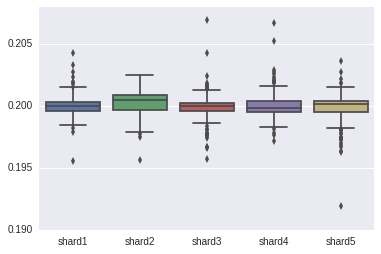

In [306]:
seaborn.boxplot(pe)

In [307]:
pe.mean()

shard1    0.200007
shard2    0.200227
shard3    0.199905
shard4    0.200027
shard5    0.199835
dtype: float64

In [308]:
pe.std()

shard1    0.000810
shard2    0.001019
shard3    0.001005
shard4    0.000998
shard5    0.001136
dtype: float64

In [309]:
rcParams['figure.figsize'] = 5, 4

In [310]:
shards.rename(columns = lambda x: 'total' if x == 'total' else '{} {}'.format(x[:5].title(), x[5]), inplace = True)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


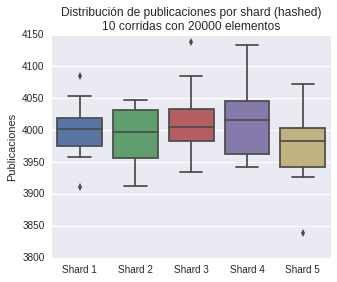

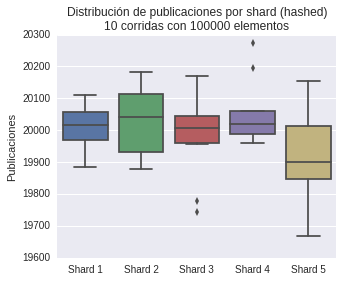

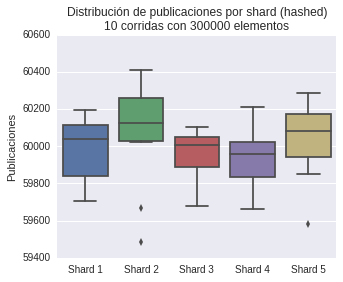

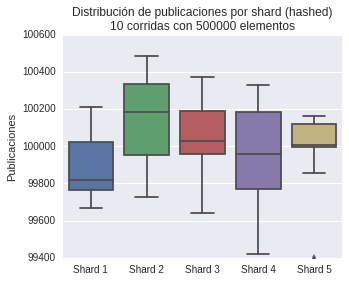

In [311]:
for total, group in shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total'):
    pyplot.title(u'Distribución de publicaciones por shard (hashed)\n10 corridas con {} elementos'.format(total))
    seaborn.boxplot(group.drop('total', axis = 1))
    
    pyplot.ylabel('Publicaciones')
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_{}.png'.format(total))
    pyplot.show()

In [312]:
type(pandas.concat([x for _, x in group.drop('total', axis = 1).iteritems()], ignore_index = True))

pandas.core.series.Series

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


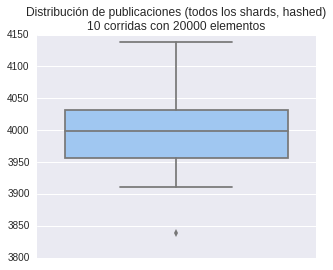

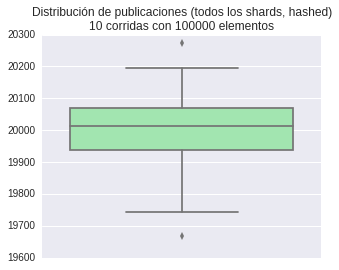

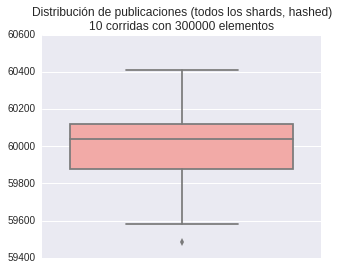

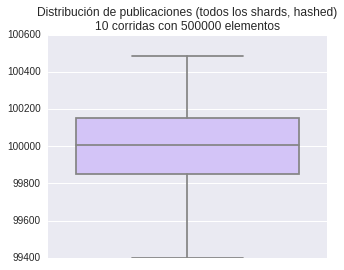

In [313]:
for e, (total, group) in enumerate(shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total')):
    pyplot.title(u'Distribución de publicaciones (todos los shards, hashed)\n10 corridas con {} elementos'.format(total))
    seaborn.boxplot(
        pandas.concat(
            [x for _, x in group.drop('total', axis = 1).iteritems()],
            ignore_index = True
        ).rename('').to_frame(),
        color = seaborn.color_palette('pastel', 4)[e]
    )
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_total_{}.png'.format(total))
    pyplot.show()

In [314]:
p

NameError: name 'p' is not defined

In [ ]:
for total, group in shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total'):
    pyplot.title(u'Distribución de publicaciones por shard (hashed)\n10 corridas con {} elementos'.format(total))
    p = group.drop('total', axis = 1)
    p = p.append(pandas.concat([x for _, x in p.iteritems()]).to_frame('Todos'))
    seaborn.boxplot(p, palette = seaborn.color_palette('pastel'))
    
    pyplot.ylabel('Publicaciones')
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_{}.png'.format(total))
    pyplot.show()